In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('data-week-3.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [4]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [5]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [6]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Ann\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.8026969481902059)

### Accuracy

In [8]:
len(y_val)

1409

In [9]:
#how many correct ones are there
(y_val == churn_decision).sum()

np.int64(1131)

In [10]:
#accuracy
1131/1409

0.8026969481902059

In [11]:
#we can try changing threshold to see if accuracy improves

thresholds = np.linspace(0,1,21) #takes first val, last val and size of array
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [12]:
scores = []
for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print(f'for t = {t:.2f}, accuracy is {score:.3f}')
    scores.append(score)

for t = 0.00, accuracy is 0.274
for t = 0.05, accuracy is 0.510
for t = 0.10, accuracy is 0.595
for t = 0.15, accuracy is 0.665
for t = 0.20, accuracy is 0.707
for t = 0.25, accuracy is 0.737
for t = 0.30, accuracy is 0.760
for t = 0.35, accuracy is 0.773
for t = 0.40, accuracy is 0.784
for t = 0.45, accuracy is 0.792
for t = 0.50, accuracy is 0.803
for t = 0.55, accuracy is 0.800
for t = 0.60, accuracy is 0.796
for t = 0.65, accuracy is 0.786
for t = 0.70, accuracy is 0.765
for t = 0.75, accuracy is 0.744
for t = 0.80, accuracy is 0.735
for t = 0.85, accuracy is 0.726
for t = 0.90, accuracy is 0.726
for t = 0.95, accuracy is 0.726
for t = 1.00, accuracy is 0.726


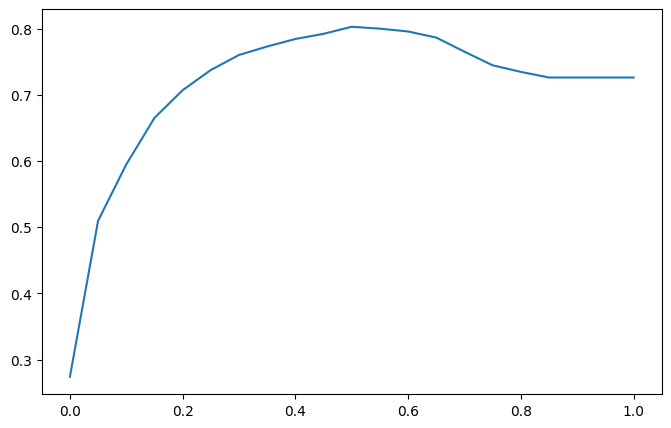

In [13]:
#lets plot scores vs thresholds
plt.figure(figsize=(8,5))
plt.plot(thresholds, scores)

In [14]:
#using inbuilt function
from sklearn.metrics import accuracy_score
scores = []
for t in thresholds:
    score = accuracy_score(y_val,y_pred>=t)
    print(f'for t = {t:.2f}, accuracy is {score:.3f}')
    scores.append(score)

for t = 0.00, accuracy is 0.274
for t = 0.05, accuracy is 0.510
for t = 0.10, accuracy is 0.595
for t = 0.15, accuracy is 0.665
for t = 0.20, accuracy is 0.707
for t = 0.25, accuracy is 0.737
for t = 0.30, accuracy is 0.760
for t = 0.35, accuracy is 0.773
for t = 0.40, accuracy is 0.784
for t = 0.45, accuracy is 0.792
for t = 0.50, accuracy is 0.803
for t = 0.55, accuracy is 0.800
for t = 0.60, accuracy is 0.796
for t = 0.65, accuracy is 0.786
for t = 0.70, accuracy is 0.765
for t = 0.75, accuracy is 0.744
for t = 0.80, accuracy is 0.735
for t = 0.85, accuracy is 0.726
for t = 0.90, accuracy is 0.726
for t = 0.95, accuracy is 0.726
for t = 1.00, accuracy is 0.726


Here we can see that even when we consider threshold as 1, we get 72% accuracy which is pretty decent. But actually there is no value in y_val >=1. So basically with threshold 1, all values will be false.
But still the model shows pretty decent accuracy because there is a class imbalance

In [15]:
y_val.mean()

np.float64(0.2739531582682754)

We see only 27 % people are churning. There is basically a 3:1 nochurning to churning rate.

So accuracy for cases with class imbalance can be quite misleading

Thats why we hve other ways of evaluating models

### Confusion table

In [16]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [17]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [18]:
predict_positive[5:10]

array([False, False, False,  True, False])

In [19]:
actual_positive[5:10]

array([False, False, False,  True,  True])

In [20]:
a = predict_positive & actual_positive
a[5:10]


array([False, False, False,  True, False])

We examine the cases where both “predict_positive” and “actual_positive” are true. This is precisely what the “&” operator represents, indicating a logical AND operation.

In [21]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()
tp,tn

(np.int64(211), np.int64(920))

In [22]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()
fp,fn

(np.int64(103), np.int64(175))

In [23]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

confusion_matrix

array([[920, 103],
       [175, 211]])

False positives represent customers who receive the email even though they are not likely to churn, resulting in a loss of money due to unnecessary discounts. False negatives are customers who do not receive the email and end up leaving, causing financial losses as well. Both situations are undesirable.

Instead of using absolute numbers, we can also express these values in relative terms to gain a better perspective on the model’s performance.

In [24]:
(confusion_matrix/ confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

Our accuracy was 80% which is basically true poistive % + true negative % 65+15

### Precision & Recall

Precision measures the fraction of positive predictions that were correct. In other words, it quantifies how accurately the model predicts customers who are likely to churn.

Precision = True Positives / (# Positive Predictions) = True Positives / (True Positives + False Positives)

Recall, on the other hand, quantifies the fraction of actual positive cases that were correctly identified by the model. It assesses how effectively the model captures all customers who are actually churning.

Recall = True Positives / (# Positive Observations) = True Positives / (True Positives + False Negatives)

In [25]:
#precision is the fraction of positive predictions that are correct
#precision is how precise our model is, from all the people our model said are positive, how many are corrct
precision = tp/(tp + fp)
precision

np.float64(0.6719745222929936)

In [26]:
#recall is correctly identified positive examples
#i.e, ot of all the positive ones, how many of them did our model catch
recall = tp/(tp+fn)
recall

#getting 54% means our model failed to catch 46% of people who are churning
#we will also send promotion discount to 33% (precision is 67%) of users who get to take advantage of that

np.float64(0.5466321243523317)

### ROC Curves

Receiver Operating Characteristics are tools for evaluating binary classification models

In [27]:
tpr = tp/(tp+fn)
tpr

np.float64(0.5466321243523317)

In [28]:
fpr = fp/(fp+tn)
fpr

np.float64(0.10068426197458455)

ROC curve evaluates these rates for all possible threshold values

In [29]:
scores = []
thresholds = np.linspace(0,1,101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))

In [30]:
scores

[(np.float64(0.0), np.int64(386), np.int64(1023), np.int64(0), np.int64(0)),
 (np.float64(0.01), np.int64(385), np.int64(915), np.int64(1), np.int64(108)),
 (np.float64(0.02), np.int64(384), np.int64(830), np.int64(2), np.int64(193)),
 (np.float64(0.03), np.int64(383), np.int64(766), np.int64(3), np.int64(257)),
 (np.float64(0.04), np.int64(381), np.int64(714), np.int64(5), np.int64(309)),
 (np.float64(0.05), np.int64(379), np.int64(684), np.int64(7), np.int64(339)),
 (np.float64(0.06), np.int64(377), np.int64(661), np.int64(9), np.int64(362)),
 (np.float64(0.07), np.int64(373), np.int64(641), np.int64(13), np.int64(382)),
 (np.float64(0.08), np.int64(371), np.int64(610), np.int64(15), np.int64(413)),
 (np.float64(0.09), np.int64(369), np.int64(578), np.int64(17), np.int64(445)),
 (np.float64(0.1), np.int64(366), np.int64(551), np.int64(20), np.int64(472)),
 (np.float64(0.11), np.int64(365), np.int64(527), np.int64(21), np.int64(496)),
 (np.float64(0.12), np.int64(365), np.int64(508), 

In [31]:
df_scores = pd.DataFrame(scores)
df_scores

,0,1,2,3,4
0,0.00,386,1023,0,0
1,0.01,385,915,1,108
2,0.02,384,830,2,193
3,0.03,383,766,3,257
4,0.04,381,714,5,309
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [32]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores

,threshold,tp,fp,fn,tn
0,0.00,386,1023,0,0
1,0.01,385,915,1,108
2,0.02,384,830,2,193
3,0.03,383,766,3,257
4,0.04,381,714,5,309
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [33]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.tn + df_scores.fp)



In [34]:
df_scores

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,385,915,1,108,0.997409,0.894428
2,0.02,384,830,2,193,0.994819,0.811339
3,0.03,383,766,3,257,0.992228,0.748778
4,0.04,381,714,5,309,0.987047,0.697947
...,...,...,...,...,...,...,...
96,0.96,0,0,386,1023,0.000000,0.000000
97,0.97,0,0,386,1023,0.000000,0.000000
98,0.98,0,0,386,1023,0.000000,0.000000
99,0.99,0,0,386,1023,0.000000,0.000000


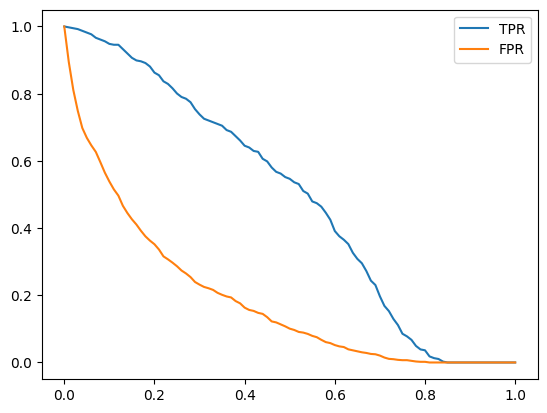

In [35]:
plt.plot(df_scores.threshold, df_scores['tpr'], label = 'TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label = 'FPR')
plt.legend()

The plot doesn't give us enough insights because we don't have anything to compare it against. So what we do now is have a baseline model.

We will take a random model that basically gives random predictions.

In [36]:
np.random.seed(1)
y_rand = np.random.uniform(0,1,size = len(y_val))

In [37]:
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089])

In [38]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [39]:
# lets plot tpr fpr for the random model

def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0,1,101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn)) 

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns = columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.tn + df_scores.fp)

    return df_scores


In [40]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [41]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


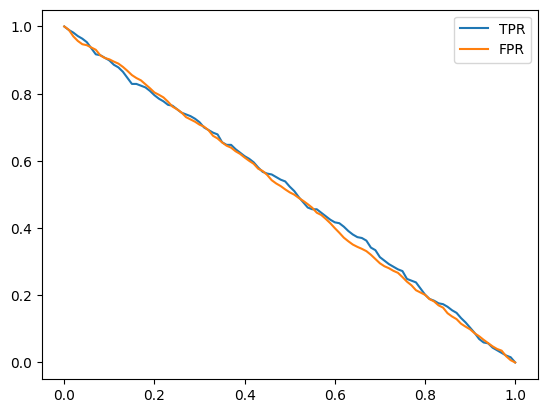

In [42]:
plt.plot(df_rand.threshold, df_rand['tpr'], label = 'TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label = 'FPR')
plt.legend()

#### Ideal Model

In [43]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(np.int64(1023), np.int64(386))

In [44]:
y_ideal = np.repeat([0,1],[num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

To create our predictions for the ideal model, which are numbers between 0 and 1, we can use the np.linspace() function to generate an array of evenly spaced values between 0 and 1. This array should have the same length as y_ideal, which is 1409 in this case.

In [45]:
y_ideal_pred = np.linspace(0, 1, len(y_ideal))
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00])

In [46]:
1-y_val.mean()     #getting above what percentage churns to get create ideal threshold 

np.float64(0.7260468417317246)

In [47]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

np.float64(1.0)

In [48]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

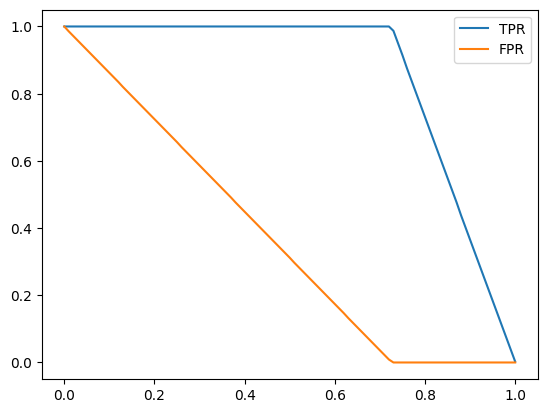

In [49]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label = 'TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label = 'FPR')
plt.legend()

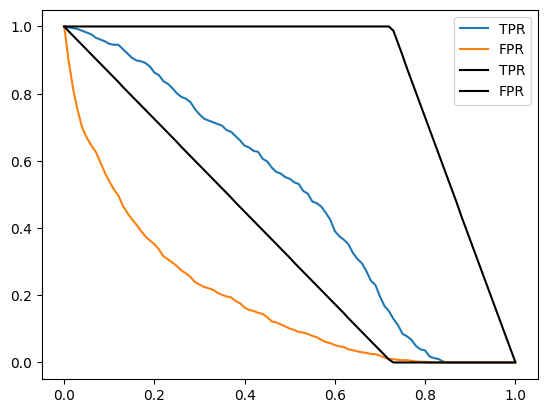

In [50]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
 
#plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
#plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
 
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR', color = 'black')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR', color = 'black')
 
plt.legend()


We see that our TPR is far from the ideal model. We want it to be as close as possible to 1. We also notice that our FPR is significantly different from that of the ideal model. Plotting against the threshold is not always intuitive. For example, in our model, the best threshold is 0.5, as we know from accuracy. However, for the ideal model, as we saw earlier, the best threshold is 0.726. So they have different thresholds. What we can do to better visualize this is to plot FPR against TPR. On the x-axis, we’ll have FPR, and on the y-axis, we’ll have TPR. To make it easier to understand, we can also add the benchmark lines.

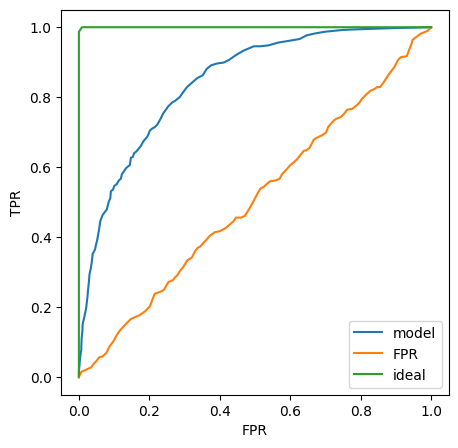

In [51]:
plt.figure(figsize=(5,5))
 
plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot(df_rand.fpr, df_rand.tpr, label='FPR')

plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')
 
plt.xlabel('FPR')
plt.ylabel('TPR')
 
plt.legend()

basically when we start of threshold is 0, true positivies, everyone is non churning meaning, threshold is 1 and it gradually decreases, right corner threshold is 0, meaniang predicts everything as true

if we take a loook at ideal model, once threshold increases above a point, it deviates from being close to y-axis
i.e, fpr increases

In [52]:
#built in function for roc curves, predicting fpr and tpr
from sklearn.metrics import roc_curve

In [53]:
fpr, tpr, thresholds = roc_curve(y_val,y_pred)

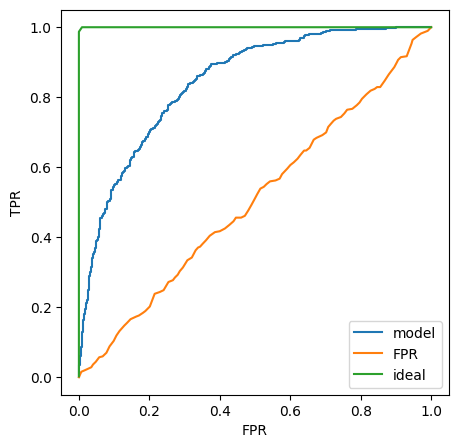

In [54]:
plt.figure(figsize=(5,5))
 
plt.plot(fpr, tpr, label='model')
plt.plot(df_rand.fpr, df_rand.tpr, label='FPR')

plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')
 
plt.xlabel('FPR')
plt.ylabel('TPR')
 
plt.legend()

### ROC AUC

In [55]:
from sklearn.metrics import auc

In [56]:
auc(fpr, tpr)

np.float64(0.8438302463039216)

In [57]:
auc(df_ideal.fpr, df_ideal.tpr)   #x and y

np.float64(0.9999430203759136)

In [58]:
#shortcut
from sklearn.metrics import roc_auc_score

In [59]:
roc_auc_score(y_val, y_pred)

np.float64(0.8438302463039216)

AUC tells us the probability that a randomly selected positive example has a score that is higher than a randomly selected negative example.

In [60]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val ==1]

In [61]:
import random

In [62]:
pos_ind = random.randint(0, len(pos)-1)
neg_ind = random.randint(0, len(neg)-1)

In [63]:
pos[pos_ind] > neg[neg_ind]

np.True_

In [64]:
n = 100000
success = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos)-1)
    neg_ind = random.randint(0, len(neg)-1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success/n

0.84279

Instead of implementing this manually, we can use NumPy. Be aware that in np.random.randint(low, high, size, dtype), ‘low’ is inclusive, and ‘high’ is exclusive.

In [65]:
pos_ind = np.random.randint(0, len(pos), size = n)
neg_ind = np.random.randint(0, len(neg), size = n)


In [66]:
neg[neg_ind]

array([0.18879458, 0.03696805, 0.02315311, ..., 0.00400358, 0.16624173,
       0.21497747])

In [67]:
(pos[pos_ind] > neg[neg_ind]).mean()

np.float64(0.84297)

### K-Cross Validation

In [68]:
def train(df_train, y_train):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
 
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
 
    model = LogisticRegression()
    model.fit(X_train, y_train)
 
    return dv, model

In [69]:
dv, model = train(df_train, y_train)

c:\Users\Ann\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
def predict(df, dv, model):
     dicts = df[categorical + numerical].to_dict(orient='records')
 
     X = dv.fit_transform(dicts)
     y_pred = model.predict_proba(X)[:,1]
 
     return y_pred

In [71]:
y_pred = predict(df_val, dv, model)
y_pred

array([0.00897173, 0.20758318, 0.21575417, ..., 0.13680504, 0.80068006,
       0.83821238])

In [72]:
from sklearn.model_selection import KFold
 
kfold = KFold(n_splits=10, shuffle=True, random_state=1) 
 
kfold.split(df_full_train)
# Output: <generator object _BaseKFold.split at 0x2838baf20>
 
train_idx, val_idx = next(kfold.split(df_full_train))
len(train_idx), len(val_idx)
# Output: (5070, 564)
 
len(df_full_train)
# Output: 5634
 
# We can use iloc to select a part of this dataframe
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [74]:
!pip install tqdm


In [75]:
from tqdm.auto import tqdm

In [77]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
 
kfold = KFold(n_splits=10, shuffle=True, random_state=1)  
scores = []
 
for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
 
    y_train = df_train.churn.values
    y_val = df_val.churn.values
 
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
 
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
 
scores

0it [00:00, ?it/s]c:\Users\Ann\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
1it [00:00,  3.53it/s]c:\Users\Ann\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver opti

[np.float64(0.8479557273030867),
 np.float64(0.8410117574257425),
 np.float64(0.8557048652060528),
 np.float64(0.8344086906427453),
 np.float64(0.8272642679900746),
 np.float64(0.8371128871128871),
 np.float64(0.8398078801693258),
 np.float64(0.8186195445920303),
 np.float64(0.8452200978212538),
 np.float64(0.8617693522906793)]

In [78]:
np.mean(scores), np.std(scores)

(np.float64(0.840887507055388), np.float64(0.01209626094418047))

In [79]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
 
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
 
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
 
    return dv, model

In [80]:
dv, model = train(df_train, y_train, C=0.001)

In [81]:
from sklearn.model_selection import KFold
 
kfold = KFold(n_splits=10, shuffle=True, random_state=1)  
 
for C in [0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
     
    scores = []
 
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
 
        y_train = df_train.churn.values
        y_val = df_val.churn.values
 
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
 
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
 
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.001 0.826 +- 0.012


c:\Users\Ann\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ann\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

C=0.01 0.841 +- 0.012


c:\Users\Ann\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ann\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

C=0.1 0.842 +- 0.012


c:\Users\Ann\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ann\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

C=0.5 0.843 +- 0.012


c:\Users\Ann\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ann\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

C=1 0.843 +- 0.012


c:\Users\Ann\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ann\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

C=5 0.843 +- 0.012


c:\Users\Ann\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ann\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

C=10 0.843 +- 0.012


c:\Users\Ann\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
